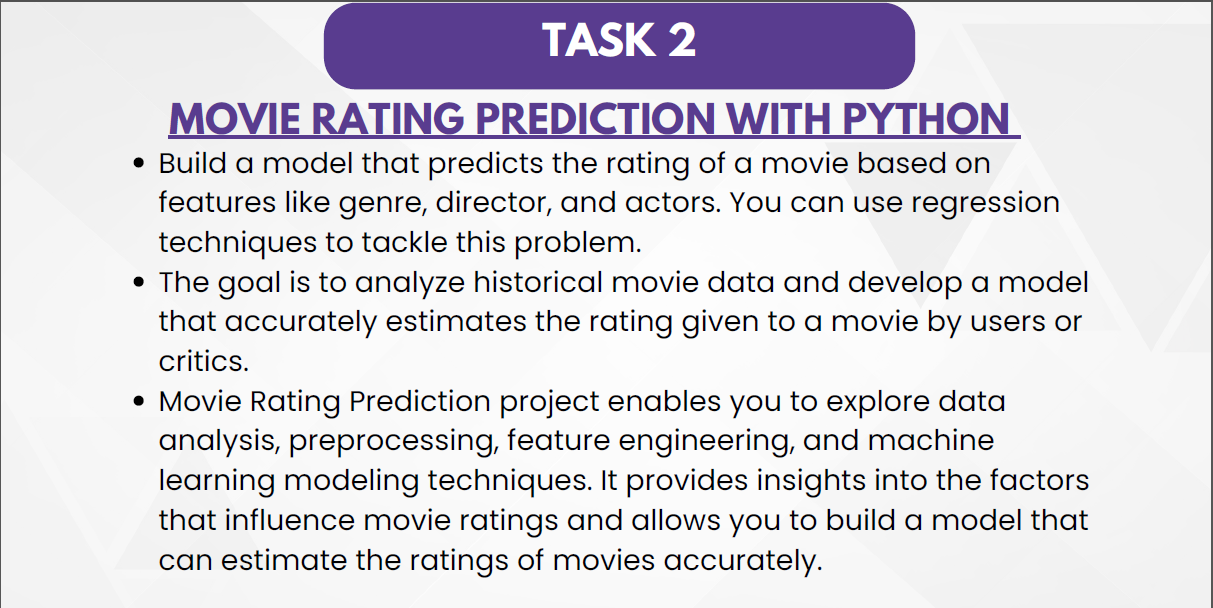

▶*TASK-2 : MOVIE RATING PREDICTION WITH PYTHON*

> Author: Hamesh Raj

> Batch: April

> Domain: Data Science

*Step 1: Import the libraries*

In [101]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
%matplotlib inline

*Step 2: load the dataset*

In [102]:
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

In [103]:
#Show the data
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


*Step 3: Data cleaning and preprocessing*

In [104]:
#shape of the dataset

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 15509
Number of columns: 10


In [105]:
#columns of the dataset
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [106]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [107]:
#check for null values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [108]:
#Some Statistics about the dataset
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [109]:
#Eliminate missing values
df.dropna(inplace=True)

In [110]:
#recheck for missing values
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [111]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [112]:
df.shape

(5659, 10)

In [113]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [114]:
#Converting votes into integer
df['Votes'] = df['Votes'].str.replace(',','').astype('int')

In [115]:
#converting the year column into integer
#strip() in Python removes unwanted strings or whitespace from the beginning and end of a string.
df['Year'] = df['Year'].str.strip('()').astype(int)

In [116]:
#remove the string min from the column
df['Duration'] = df['Duration'].str.strip('min')

In [117]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 442.1+ KB


*Step 4: Data visualization*

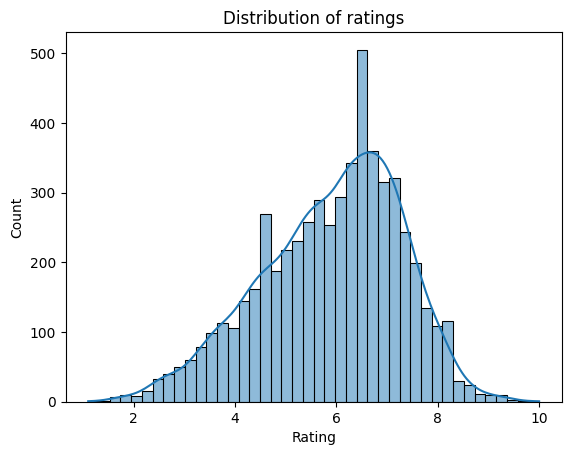

In [119]:
#Visulaze ratings 
sns.histplot(data=df,x='Rating',kde=True)
plt.title('Distribution of ratings')
plt.show()

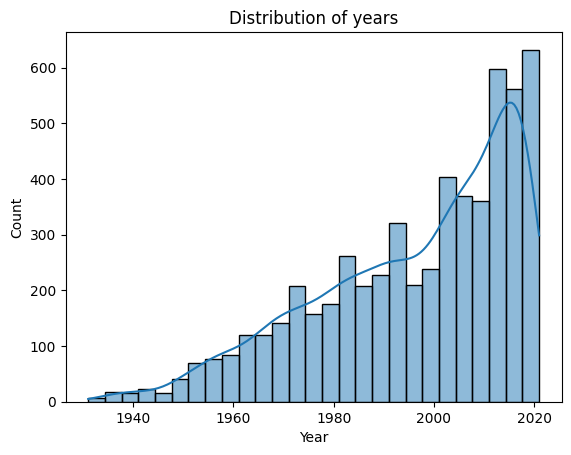

In [120]:
#visualize the years
sns.histplot(data=df,x='Year',kde=True)
plt.title('Distribution of years')
plt.show()

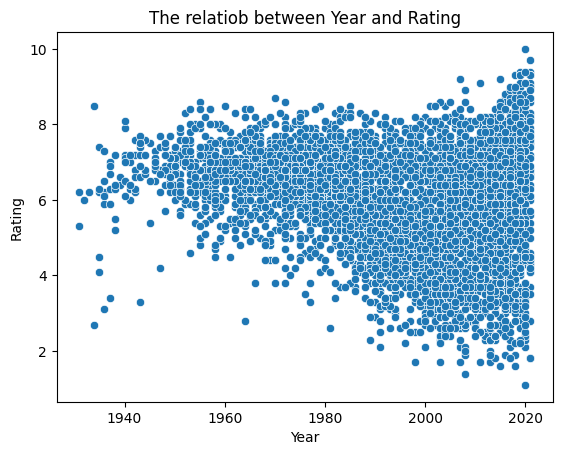

In [121]:
#visualze the relation between the year and rating
sns.scatterplot(data=df,x='Year',y='Rating')
plt.title("The relatiob between Year and Rating")
plt.show()

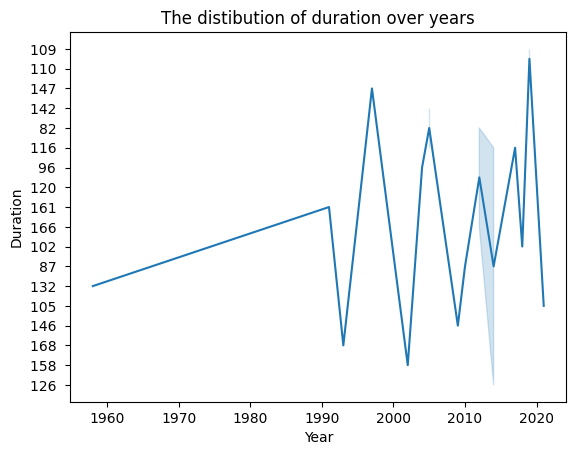

In [122]:
#the distibution of duration over years
sns.lineplot(data=df.head(20),x='Year',y='Duration')
plt.title('The distibution of duration over years')
plt.show()

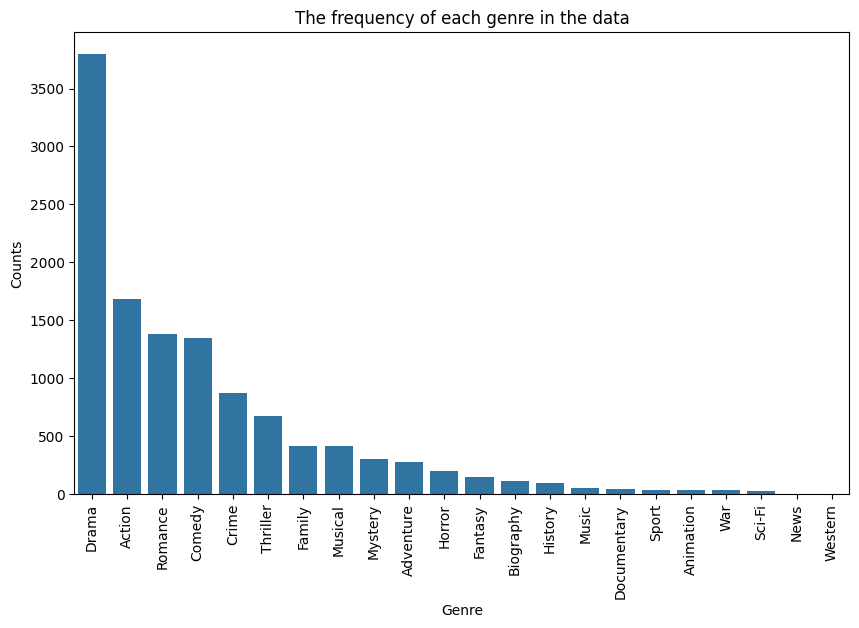

In [123]:
#visualze genre, before that let's get all the genres
movies_genre = df['Genre'].str.split(', ',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
plt.figure(figsize=(10,6))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The frequency of each genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [124]:
#Encod the column to use them in the model:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = encoder.fit_transform(df['Actor 3'])
df['Genre'] = encoder.fit_transform(df['Genre'])
df['Director'] = encoder.fit_transform(df['Director'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


In [125]:
df = df.drop('Name',axis=1)

In [126]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013


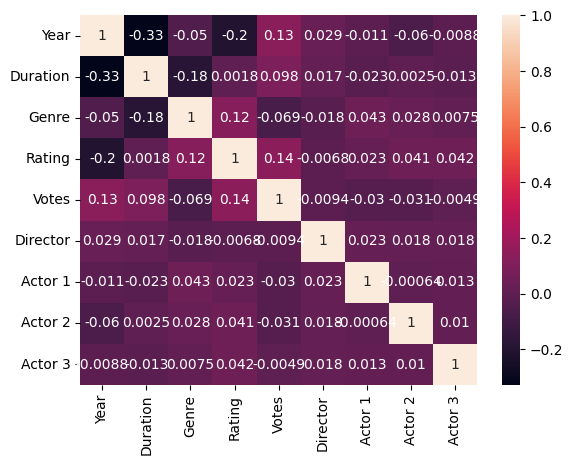

In [127]:
#Heatmap Showing the correlation between columns
sns.heatmap(df.corr(),annot=True)
plt.show()

*Step 5: Model Building*

In [128]:
#Split the dataset into training and testing sets
X = df.drop('Rating',axis=1)
y= df['Rating']

In [129]:
#Train a linear regression model using the training data.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data,
                         columns=X.columns)
scaled_df.head()

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.977778,0.293333,0.610667,0.000005,0.258848,0.690148,0.979310,0.124853
1,0.977778,0.296667,0.490667,0.000051,0.549383,0.611536,0.309914,0.840705
2,0.733333,0.420000,0.418667,0.001390,0.629630,0.192956,0.032328,0.800391
3,0.822222,0.403333,0.770667,0.001828,0.841152,0.353241,0.479310,0.987867
4,0.900000,0.203333,0.853333,0.000543,0.055556,0.987238,0.506466,0.396477


In [131]:
#Fiting the training data
from sklearn.linear_model import  LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [132]:
#predict values
y_pred = model.predict(X_test)
y_pred

array([5.63033377, 5.84119076, 5.93058305, ..., 5.60661345, 5.62132497,
       6.54181763])

In [133]:
# Evaluate the model's performance using MAE and MSE on both the training and testing sets.
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {mean_squared_error(y_test,y_pred)}")

Mean Absolute Error : 1.049562505489381
Mean Squared Error : 1.6864004365428567


In [134]:
#calculating the r2 score
print(f"R2 score : {r2_score(y_test,y_pred)}")

R2 score : 0.08929055052181323
